In [1]:
#importação das bibliotecas
import matplotlib.pyplot as pl
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import numpy as np

In [3]:
#carregamento da base de dados
(x_train,y_train),(x_test,y_test) =  mnist.load_data()

Text(0.5, 1.0, '7')

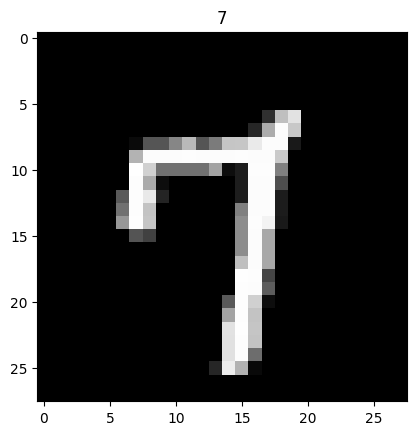

In [10]:
#vizualização de um dado em especifico
pl.imshow(x_train[750], cmap = 'gray')
pl.title(y_train[750])

In [11]:
#formatação dos dados(28x28 padrao das imagens nesse caso)(float 32 para realizar calculos)(255 valor maximo que um pixel pode obter)
x_train = x_train.reshape(-1,28,28,1).astype('float32')/255.0
x_test = x_test.reshape(-1,28,28,1).astype('float32')/255.0

In [12]:
#conversão dos targets para one shot
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [16]:
#criacao do modelo

model = Sequential()

#camada de entrada

model.add(Input(shape = (28,28,1)))

#camada de filtros

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))

#aplicação de um filtro mais especifico com a diminuição da resolucao

model.add(MaxPooling2D(pool_size = (2,2)))

#trnasformando em matriz

model.add(Flatten())

#camada densa intermediária

model.add(Dense(units = 128, activation = 'relu'))

#camada de saida para a classificação de 10 classes(0 a 9)(softmax para multiclasse)

model.add(Dense(units = 10, activation = 'softmax'))

In [17]:
#vizualização
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
#compilação do modelo, adam como otimozador, categorical cross_entropy como função de perda
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [22]:
#treinamento do modelo
model.fit(x_train, y_train, epochs = 5, batch_size = 128, validation_data = (x_test,y_test))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.8714 - loss: 0.4486 - val_accuracy: 0.9690 - val_loss: 0.0994
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.9770 - loss: 0.0796 - val_accuracy: 0.9797 - val_loss: 0.0598
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.9845 - loss: 0.0511 - val_accuracy: 0.9815 - val_loss: 0.0544
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.9892 - loss: 0.0354 - val_accuracy: 0.9839 - val_loss: 0.0485
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9917 - loss: 0.0282 - val_accuracy: 0.9818 - val_loss: 0.0532
